In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.isnull().head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [6]:
df['repeat_retailer'] = (df['repeat_retailer']).astype(int)
df['used_chip'] = (df['used_chip']).astype(int)
df['used_pin_number'] = (df['used_pin_number']).astype(int)
df['online_order'] = (df['online_order']).astype(int)
df['fraud'] = (df['fraud']).astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int32
used_chip                           int32
used_pin_number                     int32
online_order                        int32
fraud                               int32
dtype: object

In [7]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


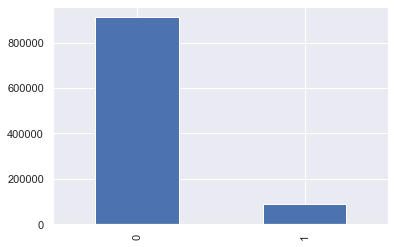

In [8]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["fraud"].map(lambda x: color_wheel.get(x + 1))
print(df.fraud.value_counts())
p=df.fraud.value_counts().plot(kind="bar")

In [9]:
f_count = df[df["fraud"] == 1]["fraud"].count()
nf_count = df[df["fraud"] == 0]["fraud"].count()
print("Number of fraud transactions:", f_count)
print("Number of non-fraud transactions:", nf_count)
print("Fraud percent:", f_count / (f_count + nf_count) * 100)

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percent: 8.7403


<BarContainer object of 1 artists>

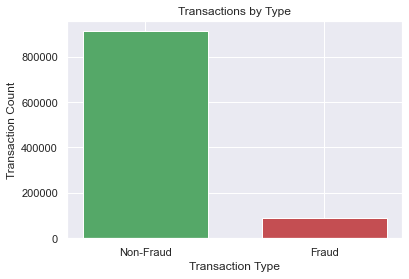

In [10]:
categories = ["Non-Fraud", "Fraud"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.title("Transactions by Type")
plt.bar(xpos[0], nf_count, width= 0.7, color = "g")
plt.bar(xpos[1], f_count, width = 0.7, color="r")

<AxesSubplot:xlabel='fraud', ylabel='count'>

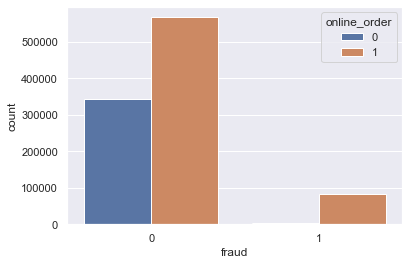

In [11]:
sns.countplot(data=df, x="fraud", hue="online_order")

<AxesSubplot:>

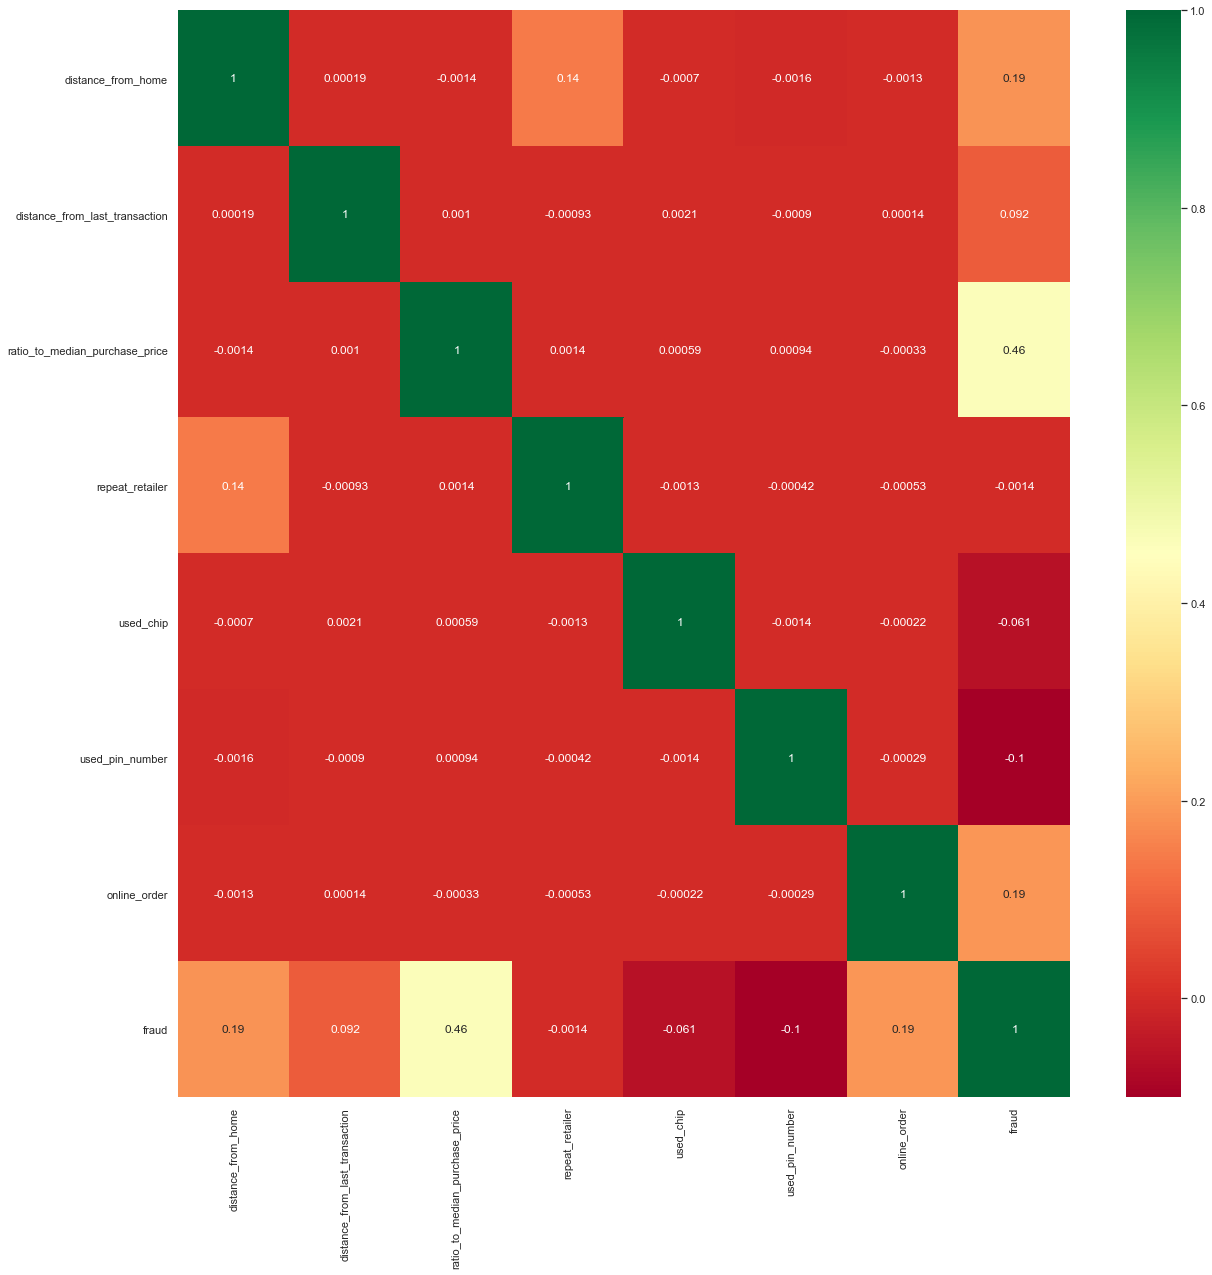

In [53]:
correlation=df.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [12]:
#Model Building
X = df.drop('fraud', axis=1)
y = df['fraud']

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [14]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred1 = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred1)*100, "%")

Accuracy Score : 99.9985 %


In [17]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred2 = nb.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred2)*100, "%")

Accuracy Score : 95.1595 %


In [19]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred3 = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred3)*100, "%")

Accuracy Score : 100.0 %


In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = RandomForestClassifier()
lr.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred4 = lr.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred4)*100, "%")

Accuracy Score : 100.0 %


In [23]:
#Visualizing Algorithms
from sklearn.metrics import classification_report, confusion_matrix

Text(0.5, 1.0, 'Accuracy Score: 0.999985')

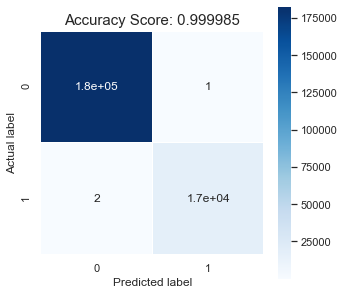

In [39]:
cm_dtree = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_dtree,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 0.951595')

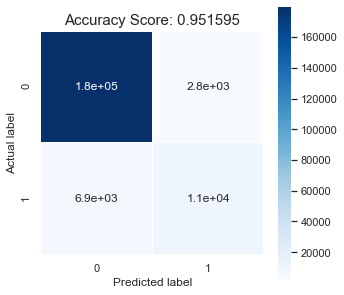

In [40]:
cm_nb = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_nb,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(nb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

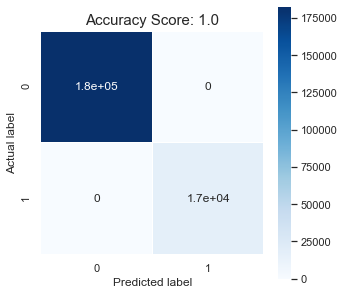

In [41]:
cm_rfc = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_rfc,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

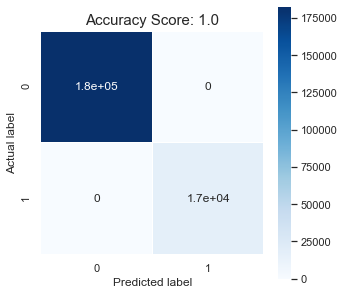

In [42]:
cm_lr = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_lr,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [27]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [28]:
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives
     # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

In [29]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
"Importance": rfc.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Feature Name,Importance
2,ratio_to_median_purchase_price,0.509922
6,online_order,0.181923
0,distance_from_home,0.137630
5,used_pin_number,0.066673
4,used_chip,0.050612
1,distance_from_last_transaction,0.046822
3,repeat_retailer,0.006418


In [30]:
final_data = pd.DataFrame({'Models':['dtree','nb','rfc','lr'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,
                     accuracy_score(y_test,y_pred4)*100
                    ]})

In [31]:
final_data

,Models,ACC
0,dtree,99.9985
1,nb,95.1595
2,rfc,100.0000
3,lr,100.0000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

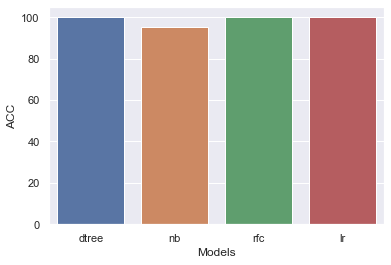

In [32]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [4]:
from termcolor import colored as cl # text customization
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, y_pred1)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Naive Bayes model is {}'.format(accuracy_score(y_test, y_pred2)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, y_pred3)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test,y_pred4 )), attrs = ['bold']))

ModuleNotFoundError: No module named 'termcolor'